In [1]:
#Run this 1
from Chapter5.DistanceMetrics import InstanceDistanceMetrics
from Chapter5.DistanceMetrics import PersonDistanceMetricsNoOrdering
from Chapter5.DistanceMetrics import PersonDistanceMetricsOrdering
from Chapter5.Clustering import NonHierarchicalClustering
from Chapter5.Clustering import HierarchicalClustering
import util.util as util
from util.VisualizeDataset import VisualizeDataset

import sys
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import argparse

In [2]:
#Run this 2
dataset_path = 'data/raw_data/processed_data/ch5__given_dataset.csv'
dataset = pd.read_csv(dataset_path, index_col=0)
dataset

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,lux_lux,loc_latitude,loc_longitude,loc_speed,...,mag_y,mag_z,labelOnTable,labelSitting,labelWashingHands,labelWalking,labelStanding,labelDriving,labelEating,labelRunning
2016-02-08 18:28:25.656222395,-0.090431,0.164098,9.631765,-0.008824,0.018529,-0.001647,NaN,NaN,NaN,NaN,...,-138.000000,-29.022000,0,0,0,0,0,0,0,0
2016-02-08 18:28:25.906222395,-0.097600,0.167640,9.631740,-0.008800,0.018540,-0.001540,1084.0,NaN,NaN,NaN,...,-139.552500,-28.970000,0,0,0,0,0,0,0,0
2016-02-08 18:28:26.156222395,-0.089120,0.167520,9.637300,-0.008880,0.018340,-0.002420,1084.0,NaN,NaN,NaN,...,-141.259200,-28.555200,0,0,0,0,0,0,0,0
2016-02-08 18:28:26.406222395,-0.090135,0.166019,9.632538,-0.008962,0.018288,-0.002038,1086.0,NaN,NaN,NaN,...,-141.133846,-28.954615,0,0,0,0,0,0,0,0
2016-02-08 18:28:26.656222395,-0.090608,0.167686,9.630078,-0.008760,0.018800,-0.002260,1084.0,NaN,NaN,NaN,...,-141.314400,-28.795200,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-08 20:41:03.906222395,-0.163020,0.184061,9.609571,-0.008592,0.021347,0.002082,NaN,NaN,NaN,NaN,...,27.660000,-10.533333,0,0,0,0,0,0,0,0
2016-02-08 20:41:04.156222395,-0.162686,0.185196,9.611863,-0.008745,0.021294,0.002000,32.0,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
2016-02-08 20:41:04.406222395,-0.159980,0.186800,9.615020,-0.008480,0.020960,0.002200,32.0,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
2016-02-08 20:41:04.656222395,-0.158882,0.184333,9.613510,-0.008529,0.020882,0.002314,32.0,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


In [3]:
#Run this 3
DataViz = VisualizeDataset()

clusteringNH = NonHierarchicalClustering()
clusteringH = HierarchicalClustering()

# Acceleration

## K-means

In [4]:
k_values = range(2, 10)
silhouette_values = []

for k in k_values:
    print(f'k = {k}')
    dataset_cluster = clusteringNH.k_means_over_instances(copy.deepcopy(
        dataset), ['acc_x', 'acc_y', 'acc_z'], k, 'default', 20, 10)
    silhouette_score = dataset_cluster['silhouette'].mean()
    print(f'silhouette = {silhouette_score}')
    silhouette_values.append(silhouette_score)

k = 2
silhouette = 0.4222849675058261
k = 3
silhouette = 0.5266018336994557
k = 4
silhouette = 0.6241707194285441
k = 5
silhouette = 0.6674459744935771
k = 6
silhouette = 0.7269953357344892
k = 7
silhouette = 0.722773064478569
k = 8
silhouette = 0.6467642727668198
k = 9
silhouette = 0.6689942823320467


Figure saved to figures/figure_1.png


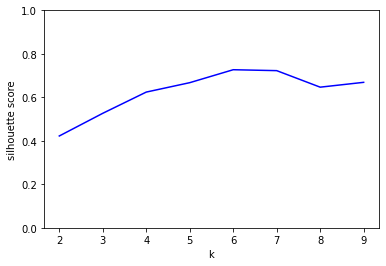

Highest K-Means silhouette score: k = 6


In [5]:
DataViz.plot_xy(x=[k_values], y=[silhouette_values], 
                xlabel='k', ylabel='silhouette score',ylim=[0, 1], line_styles=['b-'])
k = k_values[np.argmax(silhouette_values)]
print(f'Highest K-Means silhouette score: k = {k}')

## Kmediods

In [6]:
k_values = range(2, 10)
silhouette_values = []

for k in k_values:
    print(f'k = {k}')
    dataset_cluster = clusteringNH.k_medoids_over_instances(copy.deepcopy(
        dataset), ['acc_x', 'acc_y', 'acc_z'], k, 'default', 20, n_inits=10)
    silhouette_score = dataset_cluster['silhouette'].mean()
    print(f'silhouette = {silhouette_score}')
    silhouette_values.append(silhouette_score)

k = 2
silhouette = 0.4181575084042517
k = 3
silhouette = 0.5249084805226318
k = 4
silhouette = 0.6221056963418827
k = 5
silhouette = 0.6790359636580444
k = 6
silhouette = 0.7261695520253033
k = 7
silhouette = 0.6422980568040304
k = 8
silhouette = 0.6421554699811919
k = 9
silhouette = 0.6280190206855372


Figure saved to figures/figure_2.png


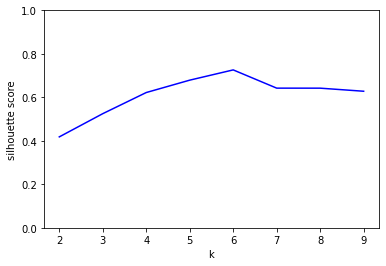

Highest K-Medoids silhouette score: k = 6
Figure saved to figures/figure_3.png


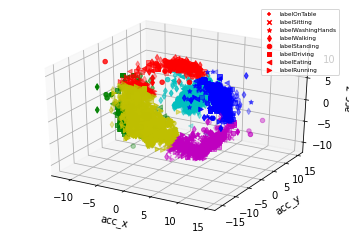

Figure saved to figures/figure_4.png


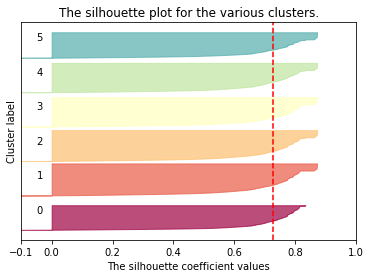

\multirow{2}{*}{ acc_x } & mean  &  -0.30 &  -8.20 &  8.24 &  -0.52 &  8.04 &  -0.81\\
 & std  &  1.08 &  0.93 &  1.01 &  1.44 &  0.98 &  1.74\\
\multirow{2}{*}{ acc_y } & mean  &  1.05 &  2.17 &  0.56 &  9.58 &  -2.29 &  -9.56\\
 & std  &  1.91 &  1.98 &  1.48 &  1.49 &  2.06 &  1.64\\
\multirow{2}{*}{ acc_z } & mean  &  9.22 &  -4.76 &  4.56 &  -0.56 &  -4.81 &  0.21\\
 & std  &  0.92 &  1.21 &  1.36 &  1.82 &  1.00 &  1.74\\
labelOnTable  & percentage  &  99.80 \% &  0.00 \% &  0.20 \% &  0.00 \% &  0.00 \% &  0.00 \%\\
labelSitting  & percentage  &  2.05 \% &  0.00 \% &  0.40 \% &  0.04 \% &  97.52 \% &  0.00 \%\\
labelWashingHands  & percentage  &  7.62 \% &  0.00 \% &  3.17 \% &  32.22 \% &  1.75 \% &  55.24 \%\\
labelWalking  & percentage  &  2.26 \% &  0.23 \% &  0.58 \% &  50.04 \% &  0.49 \% &  46.40 \%\\
labelStanding  & percentage  &  4.19 \% &  0.35 \% &  0.60 \% &  46.00 \% &  0.52 \% &  48.34 \%\\
labelDriving  & percentage  &  1.70 \% &  22.30 \% &  55.77 \% &  0.23 \% 

In [7]:
DataViz.plot_xy(x=[k_values], y=[silhouette_values], xlabel='k', ylabel='silhouette score',
                ylim=[0, 1], line_styles=['b-'])

k = k_values[np.argmax(silhouette_values)]
print(f'Highest K-Medoids silhouette score: k = {k}')

dataset_kmed = clusteringNH.k_medoids_over_instances(copy.deepcopy(dataset), 
                                                     ['acc_x', 'acc_y', 'acc_z'], 
                                                     k, 'default', 20, n_inits=50)
DataViz.plot_clusters_3d(dataset_kmed, ['acc_x', 'acc_y', 'acc_z'], 'cluster', ['label'])
DataViz.plot_silhouette(dataset_kmed, 'cluster', 'silhouette')
util.print_latex_statistics_clusters(dataset_kmed, 'cluster', 
                                     ['acc_x', 'acc_y', 'acc_z'], 'label')

## hierarchical

In [ ]:
#Run this 4
k_values = range(2, 10)
silhouette_values = []

for k in k_values:
    print(f'k = {k}')
    dataset_cluster, l = clusteringH.agglomerative_over_instances(dataset, 
                                                          ['acc_x', 'acc_y', 'acc_z'], 
                                                          k, 'euclidean', 
                                                          link_function='ward')
    silhouette_score = dataset_cluster['silhouette'].mean()
    print(f'silhouette = {silhouette_score}')
    silhouette_values.append(silhouette_score)

k = 2


In [ ]:
#Run this 5
if k == k_values[0]:
        DataViz.plot_dendrogram(dataset_cluster, l)
DataViz.plot_xy(x=[k_values], y=[silhouette_values], xlabel='k', ylabel='silhouette score',
                ylim=[0, 1], line_styles=['b-'])

# Gyroscope

## K-means

In [4]:
k_values = range(2, 10)
silhouette_values = []

for k in k_values:
    print(f'k = {k}')
    dataset_cluster = clusteringNH.k_means_over_instances(copy.deepcopy(
        dataset), ['gyr_x', 'gyr_y', 'gyr_z'], k, 'default', 20, 10)
    silhouette_score = dataset_cluster['silhouette'].mean()
    print(f'silhouette = {silhouette_score}')
    silhouette_values.append(silhouette_score)

k = 2
silhouette = 0.6959571315421855
k = 3
silhouette = 0.6638825154440575
k = 4
silhouette = 0.6727268414011286
k = 5
silhouette = 0.6670282024482697
k = 6
silhouette = 0.6735037979393944
k = 7
silhouette = 0.6538692717172225
k = 8
silhouette = 0.6609697155902514
k = 9
silhouette = 0.6733143102519269


Figure saved to figures/figure_1.png


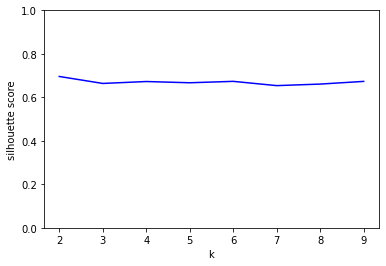

Highest K-Means silhouette score: k = 2


In [5]:
DataViz.plot_xy(x=[k_values], y=[silhouette_values], 
                xlabel='k', ylabel='silhouette score',ylim=[0, 1], line_styles=['b-'])
k = k_values[np.argmax(silhouette_values)]
print(f'Highest K-Means silhouette score: k = {k}')

## Kmediods

In [4]:
k_values = range(2, 10)
silhouette_values = []

for k in k_values:
    print(f'k = {k}')
    dataset_cluster = clusteringNH.k_medoids_over_instances(copy.deepcopy(
        dataset), ['gyr_x', 'gyr_y', 'gyr_z'], k, 'default', 20, n_inits=10)
    silhouette_score = dataset_cluster['silhouette'].mean()
    print(f'silhouette = {silhouette_score}')
    silhouette_values.append(silhouette_score)

k = 2
silhouette = 0.6180831224392203
k = 3
silhouette = 0.6464462046173635
k = 4
silhouette = 0.637641649160656
k = 5
silhouette = 0.6587387773813451
k = 6
silhouette = 0.641918123321794
k = 7
silhouette = 0.6526631510282952
k = 8
silhouette = 0.6387201581739769
k = 9
silhouette = 0.655904824846026


Figure saved to figures/figure_1.png


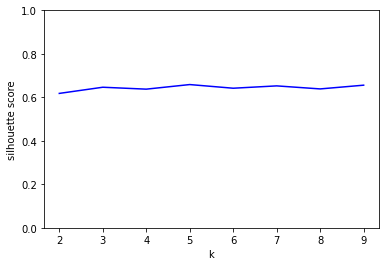

Highest K-Medoids silhouette score: k = 5
Figure saved to figures/figure_2.png


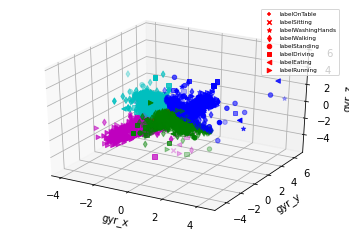

Figure saved to figures/figure_3.png


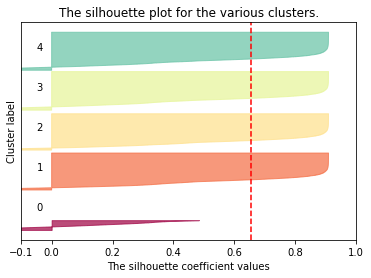

\multirow{2}{*}{ gyr_x } & mean  &  -0.02 &  0.54 &  0.84 &  -1.17 &  -1.34\\
 & std  &  0.15 &  0.60 &  0.61 &  0.50 &  0.65\\
\multirow{2}{*}{ gyr_y } & mean  &  0.03 &  -0.63 &  0.60 &  -0.05 &  -0.15\\
 & std  &  0.15 &  0.57 &  0.60 &  0.68 &  0.81\\
\multirow{2}{*}{ gyr_z } & mean  &  -0.00 &  -0.41 &  0.67 &  0.82 &  -1.25\\
 & std  &  0.12 &  0.55 &  0.69 &  0.58 &  0.79\\
labelOnTable  & percentage  &  99.60 \% &  0.24 \% &  0.12 \% &  0.04 \% &  0.00 \%\\
labelSitting  & percentage  &  97.92 \% &  0.88 \% &  0.58 \% &  0.15 \% &  0.47 \%\\
labelWashingHands  & percentage  &  89.21 \% &  4.76 \% &  2.70 \% &  2.06 \% &  1.27 \%\\
labelWalking  & percentage  &  20.52 \% &  25.67 \% &  25.14 \% &  15.13 \% &  13.55 \%\\
labelStanding  & percentage  &  94.99 \% &  2.12 \% &  1.68 \% &  0.73 \% &  0.48 \%\\
labelDriving  & percentage  &  98.05 \% &  0.71 \% &  0.73 \% &  0.35 \% &  0.15 \%\\
labelEating  & percentage  &  97.27 \% &  0.69 \% &  0.97 \% &  0.74 \% &  0.32 \%\\
label

In [5]:
DataViz.plot_xy(x=[k_values], y=[silhouette_values], xlabel='k', ylabel='silhouette score',
                ylim=[0, 1], line_styles=['b-'])

k = k_values[np.argmax(silhouette_values)]
print(f'Highest K-Medoids silhouette score: k = {k}')

dataset_kmed = clusteringNH.k_medoids_over_instances(copy.deepcopy(dataset), 
                                                     ['gyr_x', 'gyr_y', 'gyr_z'], 
                                                     k, 'default', 20, n_inits=50)
DataViz.plot_clusters_3d(dataset_kmed, ['gyr_x', 'gyr_y', 'gyr_z'], 'cluster', ['label'])
DataViz.plot_silhouette(dataset_kmed, 'cluster', 'silhouette')
util.print_latex_statistics_clusters(dataset_kmed, 'cluster', 
                                     ['gyr_x', 'gyr_y', 'gyr_z'], 'label')

## hierarchical

In [ ]:
#Run this 6
k_values = range(2, 10)
silhouette_values = []

for k in k_values:
    print(f'k = {k}')
    dataset_cluster, l = clusteringH.agglomerative_over_instances(dataset, 
                                                          ['gyr_x', 'gyr_y', 'gyr_z'], 
                                                          k, 'euclidean', use_prev_linkage=True, 
                                                          link_function='ward')
    silhouette_score = dataset_cluster['silhouette'].mean()
    print(f'silhouette = {silhouette_score}')
    silhouette_values.append(silhouette_score)

k = 2


In [ ]:
#Run this 7
if k == k_values[0]:
        DataViz.plot_dendrogram(dataset_cluster, l)
DataViz.plot_xy(x=[k_values], y=[silhouette_values], xlabel='k', ylabel='silhouette score',
                ylim=[0, 1], line_styles=['b-'])